In [2]:
#!apt-get install protobuf-compiler python-tk

In [3]:
#!git clone --depth 1 https://github.com/tensorflow/models tf_models
#!cd tf_models/research/
#!protoc object_detection/protos/*.proto --python_out=.
#!cp object_detection/packages/tf2/setup.py .

'tensorflow==2.7.0',
'tf-models-official==2.7.0',
'tensorflow_io==0.23.1',

In [4]:
#!cd tf_models/research/
#!protoc object_detection/protos/*.proto --python_out=.
#!cp object_detection/packages/tf2/setup.py .

#%cd "/content/tf_models/research/object_detection/packages/tf2"
#!python -m pip install .

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#!pip install h5py
#!pip install typing-extensions
#!pip install wheel

Extract Motion Mask

In [ ]:
#%cd "/content/gdrive/MyDrive/Colab Notebooks/"

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#!ls "/content/gdrive/MyDrive/Colab Notebooks/"

 aic19-track3-train-data.zip   model_main_tf2.py	     testAnomaly.ipynb
 aic-test		      'Motion mask 16'		     train
 csv			       my_faster_rcnn_v1	     training_models
 detect_anomaly.py	      'New anomaly videos Youtube'   train.tfrecord
 exporter_main_v2.py	      'Output detection'	     Untitled0.ipynb
 extract_motion_mask.py       'Output detection 1'	     val
 label_map.pbtxt	       scripts			     val.tfrecord
 model_config		       submissions		     visualize


In [ ]:
#!python extract_motion_mask.py 

FPS = 25.0
FPS = 29.96994169150378


In [ ]:
from pathlib import Path

import numpy as np
import cv2
from tqdm import tqdm
from skimage.measure import label
import os
import glob
TEST_FOLDER="/content/gdrive/MyDrive/Colab Notebooks/New anomaly videos Youtube/*.mp4"
MASK_DIR=Path("/content/gdrive/MyDrive/Colab Notebooks/Motion mask 16")
for file in glob.glob(TEST_FOLDER):
  vidname=str(file).split(".")[0].split("/")[-1]
  if(vidname!='15' and vidname!='16'):  continue
  else: print(vidname)

16
15


In [ ]:
#!pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 8.0 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 231 kB 68.3 MB/s 
     |████████████████████████████████| 138 kB 72.1 MB/s 
     |████████████████████████████████| 48 kB 7.0 MB/s 
     |████████████████████████████████| 51 kB 9.0 MB/s 
     |████████████████████████████████| 4.0 MB 59.1 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=b392a8e357099e9a2248ade2360417b33686422192757d80fae5d6197e9d6053
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packa

In [ ]:
#!pip install opencv-python

In [ ]:
#!pip install "opencv-python-headless<4.3"

     |████████████████████████████████| 21.6 MB 56.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


Detection.ipynb: extract average image and run object detection model

In [ ]:
import os
import time
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

from object_detection.utils import label_map_util

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
TEST_DIR=Path("/content/gdrive/MyDrive/Colab Notebooks/New anomaly videos Youtube")
MASK_DIR=Path("/content/gdrive/MyDrive/Colab Notebooks/Motion mask 16")
DETECTION_DIR = Path("/content/gdrive/MyDrive/Colab Notebooks/Output detection")

In [ ]:
PATH_TO_SAVED_MODEL = '/content/gdrive/MyDrive/Colab Notebooks/my_faster_rcnn_v1/saved_model'
PATH_TO_LABEL_MAP = '/content/tf_models/research/object_detection/data/mscoco_label_map.pbtxt'
#PATH_TO_LABEL_MAP = '/content/gdrive/MyDrive/Colab Notebooks/label_map.pbtxt'

#category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABEL_MAP, use_display_name=True)

In [ ]:
category_index={1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitcase'},
 34: {'id': 34, 'name': 'frisbee'},
 35: {'id': 35, 'name': 'skis'},
 36: {'id': 36, 'name': 'snowboard'},
 37: {'id': 37, 'name': 'sports ball'},
 38: {'id': 38, 'name': 'kite'},
 39: {'id': 39, 'name': 'baseball bat'},
 40: {'id': 40, 'name': 'baseball glove'},
 41: {'id': 41, 'name': 'skateboard'},
 42: {'id': 42, 'name': 'surfboard'},
 43: {'id': 43, 'name': 'tennis racket'},
 44: {'id': 44, 'name': 'bottle'},
 46: {'id': 46, 'name': 'wine glass'},
 47: {'id': 47, 'name': 'cup'},
 48: {'id': 48, 'name': 'fork'},
 49: {'id': 49, 'name': 'knife'},
 50: {'id': 50, 'name': 'spoon'},
 51: {'id': 51, 'name': 'bowl'},
 52: {'id': 52, 'name': 'banana'},
 53: {'id': 53, 'name': 'apple'},
 54: {'id': 54, 'name': 'sandwich'},
 55: {'id': 55, 'name': 'orange'},
 56: {'id': 56, 'name': 'broccoli'},
 57: {'id': 57, 'name': 'carrot'},
 58: {'id': 58, 'name': 'hot dog'},
 59: {'id': 59, 'name': 'pizza'},
 60: {'id': 60, 'name': 'donut'},
 61: {'id': 61, 'name': 'cake'},
 62: {'id': 62, 'name': 'chair'},
 63: {'id': 63, 'name': 'couch'},
 64: {'id': 64, 'name': 'potted plant'},
 65: {'id': 65, 'name': 'bed'},
 67: {'id': 67, 'name': 'dining table'},
 70: {'id': 70, 'name': 'toilet'},
 72: {'id': 72, 'name': 'tv'},
 73: {'id': 73, 'name': 'laptop'},
 74: {'id': 74, 'name': 'mouse'},
 75: {'id': 75, 'name': 'remote'},
 76: {'id': 76, 'name': 'keyboard'},
 77: {'id': 77, 'name': 'cell phone'},
 78: {'id': 78, 'name': 'microwave'},
 79: {'id': 79, 'name': 'oven'},
 80: {'id': 80, 'name': 'toaster'},
 81: {'id': 81, 'name': 'sink'},
 82: {'id': 82, 'name': 'refrigerator'},
 84: {'id': 84, 'name': 'book'},
 85: {'id': 85, 'name': 'clock'},
 86: {'id': 86, 'name': 'vase'},
 87: {'id': 87, 'name': 'scissors'},
 88: {'id': 88, 'name': 'teddy bear'},
 89: {'id': 89, 'name': 'hair drier'},
 90: {'id': 90, 'name': 'toothbrush'}}

In [ ]:
category_index={1: {'id': 1, 'name': 'vehicle'}}

In [ ]:
print('Loading model...')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.compat.v2.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...
Done! Took 31.09120798110962 seconds


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
DETECTION_DIR.mkdir(parents=True, exist_ok=True)

alpha = 0.02

for filename in os.scandir(TEST_DIR):
  vid_id=str(filename).split(" ")[1].split(".")[0].split("'")[1]
  entries = []
  if (vid_id!='15' and vid_id!='16'): continue
  else:
   cap = cv2.VideoCapture(str(filename.path))
   fps = int(cap.get(cv2.CAP_PROP_FPS) + 0.5)
   gap = fps // 5
   tqdm.write(f'Video {vid_id}, FPS = {cap.get(cv2.CAP_PROP_FPS)}')
   total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
   mask_path=str(MASK_DIR)+"/"+vid_id+".jpg"

   mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

   avg_frame = None
   last_frame = None
   cnt_skipped = 0
   for idx in tqdm(range(total_frame_count), mininterval=1):
       ret, frame = cap.read()
       if not ret:
           print(f'Total frame read: {idx}')
           break

       if idx % gap == 0:
           if last_frame is not None:
               i1 = np.float32(frame)
               i2 = np.float32(last_frame)
               diff_frame = np.abs(i1 - i2)

               if np.max(diff_frame) < 5:
                   cnt_skipped += 1
                   continue

           last_frame = frame

           if avg_frame is None:
               avg_frame = frame
           else:
               avg_frame = (1 - alpha) * avg_frame + alpha * frame

           img = cv2.cvtColor(avg_frame.astype(np.float32), cv2.COLOR_BGR2RGB)
           img[mask == 0] = 0

           input_tensor = tf.convert_to_tensor(img, dtype=tf.uint8)

           height, width, _ = input_tensor.shape

           # Add batch dimension
           detections = detect_fn(input_tensor[tf.newaxis, ...])

           # All outputs are batches tensors.
           # Convert to numpy arrays, and take index [0] to remove the batch dimension.
           # We're only interested in the first num_detections.
           num_detections = int(detections.pop('num_detections'))
           #result = detections.items()
           # Convert object to a list
           #data = list(result)
           # Convert list to an array
           #numpyArray = np.array(data)
           #num_detections=numpyArray[0]
           detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
           detections['num_detections'] = num_detections

           # detection_classes should be ints.
           detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

           for box, class_id, score in zip(detections['detection_boxes'], detections['detection_classes'],
                                           detections['detection_scores']):
               #if score > 0.2 and category_index[class_id]['name'] in ['car', 'bus', 'truck', 'train', 'bicycle', 'motorcycle']:
               org_box = [box[1] * width, box[0] * height, box[3] * width, box[2] * height]
               entries.append((vid_id, idx, *org_box, score))
 
   df = pd.DataFrame(entries, columns=['video_id', 'frame_id', 'x_min', 'y_min', 'x_max', 'y_max', 'score'])
   df.to_csv(DETECTION_DIR / f'{vid_id}.csv', index=False)

   print(f'Video {vid_id}, skipped {cnt_skipped} frames')

Video 16, FPS = 25.0


  0%|          | 0/1627 [00:03<?, ?it/s]


UnknownError: ignored

Detect anomaly

In [ ]:
#%cd "/content/gdrive/MyDrive/Colab Notebooks/"

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#!python detect_anomaly.py

Using min_detection_confidence = 0.2
Video 6, anomaly start 0, end 50, len = 50, box: (1371.4768981933594, 470.9034204483032, 1450.0072860717771, 548.2933688163757), score: 0.7063424129090909
Video 6, anomaly start 0, end 50, len = 50, box: (1371.4768981933594, 470.9034204483032, 1450.0072860717771, 548.2933688163757), score: 0.7063424129090909
Video 6, anomaly start 0, end 50, len = 50, box: (1371.4768981933594, 470.9034204483032, 1450.0072860717771, 548.2933688163757), score: 0.7063424129090909
Video 6, anomaly start 0, end 50, len = 50, box: (1371.4768981933594, 470.9034204483032, 1450.0072860717771, 548.2933688163757), score: 0.7063424129090909
Video 6, anomaly start 0, end 50, len = 50, box: (1371.4768981933594, 470.9034204483032, 1450.0072860717771, 548.2933688163757), score: 0.7063424129090909
Video 6, anomaly start 0, end 63, len = 63, box: (610.1815795898438, 673.8315010070801, 877.0197486877441, 799.5748543739319), score: 0.7260022123770491
Video 6, anomaly start 0, end 63, l

Visualize.ipynb

In [ ]:
import os
import time
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from tqdm import tqdm

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
VIDEO_ID = '10_1'
FRAME_ID = 0

In [ ]:
# For local running
TEST_FOLDER="D:/2. Year 2/Semester 2/WR227 Technical writing/Data anomaly Youtube/data*.mp4"
MASK_DIR=Path("/content/gdrive/MyDrive/Colab Notebooks/Motion mask 16")

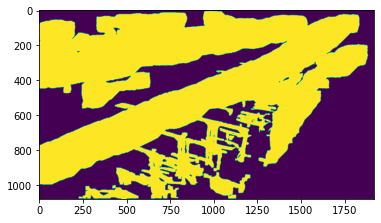

In [ ]:
mask_path = str(MASK_DIR)+"/"+VIDEO_ID+".jpg"
mask = plt.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

In [ ]:
%%time

alpha = 0.02
video_path = TEST_DIR / f'{VIDEO_ID}.mp4'
cap = cv2.VideoCapture(str(video_path))

fps = int(cap.get(cv2.CAP_PROP_FPS) + 0.5)
gap = fps // 5
assert fps == 30
assert FRAME_ID % gap == 0

total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
assert FRAME_ID < total_frame_count

avg_frame = None
last_frame = None
cnt_skipped = 0

for idx in tqdm(range(FRAME_ID + 1), mininterval=1):
    ret, frame = cap.read()
    if not ret:
        print(f'Error! Total frame read: {idx}')
        break

    if idx % gap == 0:
        if last_frame is not None:
            i1 = np.float32(frame)
            i2 = np.float32(last_frame)
            diff_frame = np.abs(i1 - i2)

            if np.max(diff_frame) < 5:
                cnt_skipped += 1
                continue

        last_frame = frame

        if avg_frame is None:
            avg_frame = frame
        else:
            avg_frame = (1 - alpha) * avg_frame + alpha * frame
        
        img = cv2.cvtColor(avg_frame.astype(np.float32), cv2.COLOR_BGR2RGB)

100%|██████████| 1/1 [00:00<00:00, 19.50it/s]

CPU times: user 115 ms, sys: 18.2 ms, total: 133 ms
Wall time: 1.58 s


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks"

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
last_frame=frame

In [ ]:
cv2.imwrite('visualize/'+VIDEO_ID+"_0.jpg", last_frame)
cv2.imwrite('visualize/'+VIDEO_ID+"_1.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
img[mask == 0] = 0
cv2.imwrite('visualize/'+VIDEO_ID+"_2.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

In [ ]:
img=cv2.cvtColor(frame.astype(np.float32), cv2.COLOR_BGR2RGB)
img[mask==0]=0
cv2.imwrite('visualize/'+VIDEO_ID+" convert.jpg", img)

True

Video 10_1

In [ ]:
import os
import time
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from tqdm import tqdm

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
#bbox=(1341.4584732055664, 267.3058122396469, 1431.9112014770508, 327.1693217754364)
#bbox=(1339.2249298095703, 211.8777483701706, 1413.9063262939453, 265.79158186912537)
#bbox=(1749.1283798217771, 247.46398866176605, 1843.411445617676, 337.74770736694336)
#bbox=(722.1421051025391, 510.93596935272217, 907.3396682739258, 609.3940472602844)
#bbox=(1301.9906616210938, 505.3021717071533, 1396.2054061889648, 579.247841835022)
#bbox=(1371.4768981933594, 470.9034204483032, 1450.0072860717771, 548.2933688163757)
#bbox=(359.69993591308594, 71.04090750217438, 414.8473358154297, 109.96359586715698)
#bbox=(820.6644439697266, 581.7990732192993, 994.3304443359376, 720.0)
#bbox=(940.8012771606444, 366.7338144779205, 989.9551391601562, 407.2549545764923)
#bbox=(795.8958435058594, 574.8937797546387, 954.887523651123, 740.2610421180725)
#bbox=(151.34637832641602, 519.5678758621216, 219.6475601196289, 562.370138168335)
#bbox=(817.4843597412109, 226.4284586906433, 833.8229370117188, 239.46028232574463)
#bbox=(808.6259460449219, 494.2797517776489, 857.8459930419922, 560.5301856994629)
#bbox=(45.22802531719208, 82.94540405273438, 197.9340863227844, 173.31220149993896)
#bbox=(343.88299226760864, 93.29007625579834, 533.3229732513428, 160.07034301757812)
#bbox=(437.5868797302246, 477.0202088356018, 633.7109184265137, 584.8985695838928)
#bbox=(1239.7074508666992, 106.73068642616272, 1410.4314422607422, 235.99665999412537)
#bbox=(1570.451545715332, 207.5400048494339, 1740.8001708984375, 300.9510612487793)
#bbox=(670.554313659668, 952.6211857795716, 878.6797142028809, 1076.680347919464)
bbox=(610.1815795898438, 673.8315010070801, 877.0197486877441, 799.5748543739319)

In [ ]:
xmin=(bbox[0])
ymin=(bbox[1])
xmax=(bbox[2])
ymax=(bbox[3])

In [ ]:
start_point=(xmin, ymin)
w=xmax-xmin
h=ymax-ymin

In [1]:
# For local running
TEST_FOLDER="D:/2. Year 2/Semester 2/WR227 Technical writing/Data anomaly Youtube/data*.mp4"
MASK_DIR=Path("C:/Users/dinhm/Download/Motion mask 16")

NameError: name 'Path' is not defined

In [ ]:
VIDEO_ID='6'

In [ ]:
alpha = 0.02
video_path = TEST_DIR / f'{VIDEO_ID}.mp4'
cap = cv2.VideoCapture(str(video_path))

fps = int(cap.get(cv2.CAP_PROP_FPS) + 0.5)

In [ ]:
#imgpath='visualize/'+VIDEO_ID+"_2.jpg"

In [ ]:
#time=10
#time=43
#time=11
#time=0
#time=50
#time=8
#time=320
#time=14
#time=76
#time=179
#time=22
#time=60
#time=9
#time=49
#time=10
#time=275
time=33
if time!=0: frame_number=time*fps-1
else: frame_number=0

In [ ]:
mask_path

'/content/gdrive/MyDrive/Colab Notebooks/Motion mask 16/12_1.jpg'

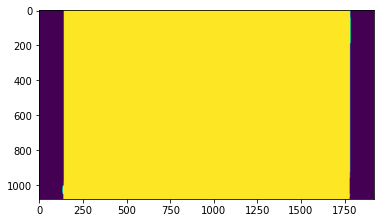

In [ ]:
mask_path = str(MASK_DIR)+"/"+VIDEO_ID+".jpg"
mask = plt.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

In [ ]:
import cv2
cap = cv2.VideoCapture(str(video_path))
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res, frame = cap.read()
frame[mask==0]=0
cv2.imwrite('visualize/'+VIDEO_ID+"_"+str(time)+".jpg", frame)

True

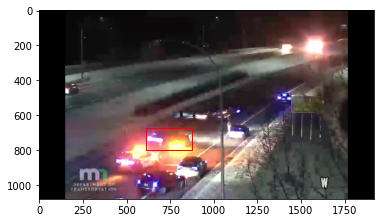

In [ ]:
img = cv2.imread('visualize/'+VIDEO_ID+"_"+str(time)+".jpg")
  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch( Rectangle(start_point,
                        w, h,
                        fc ='none', 
                        ec ='r',
                        lw = 1) )
plt.savefig("visualize/vid "+VIDEO_ID+" second "+str(time)+" 3.jpg")

Video 6

In [ ]:
VIDEO_ID = '6'
FRAME_ID = 0